In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data['species'] = data['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Plotting Box Plots
### Checking outliers

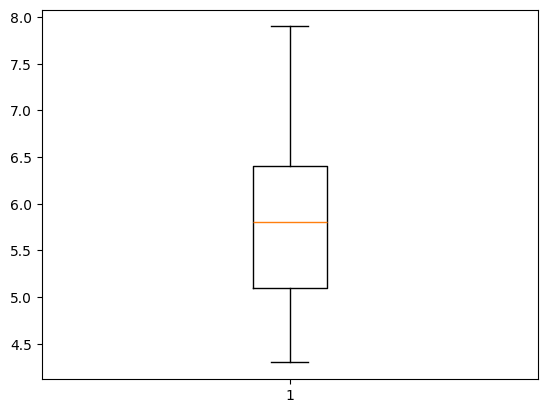

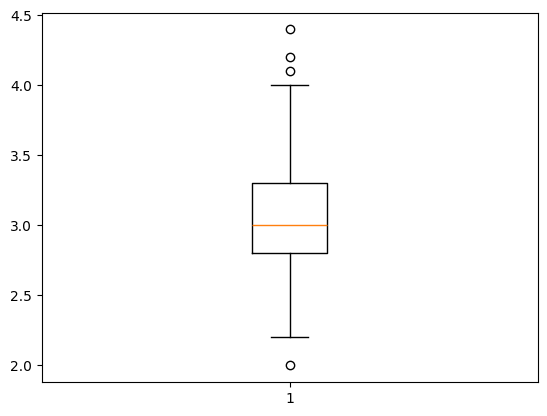

In [9]:
plt.figure(1)
plt.boxplot([data['sepal_length']])
plt.figure(2)
plt.boxplot([data['sepal_width']])
plt.show()

### Data Visualization
### Plotting Histogram

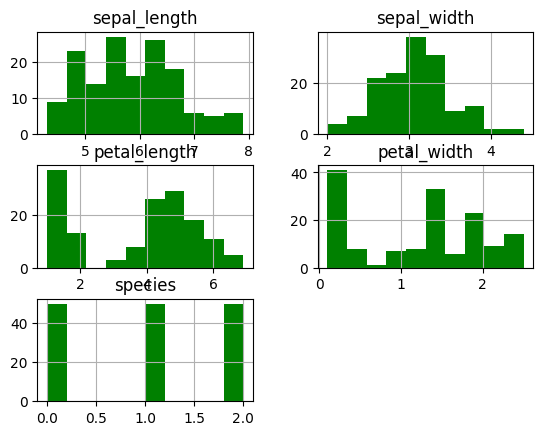

In [10]:
data.hist(color='green')
plt.show()

sepal_length       Axes(0.125,0.653529;0.227941x0.226471)
sepal_width     Axes(0.398529,0.653529;0.227941x0.226471)
petal_length    Axes(0.672059,0.653529;0.227941x0.226471)
petal_width        Axes(0.125,0.381765;0.227941x0.226471)
species         Axes(0.398529,0.381765;0.227941x0.226471)
dtype: object

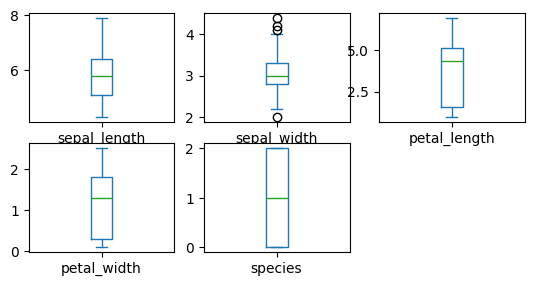

In [11]:
data.plot(kind='box',subplots=True,layout=(3,3))

In [12]:
x = data['sepal_length'].values.reshape(-1,1)
print(x)


[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [13]:
y = data['sepal_width'].values.reshape(-1,1)
print(y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

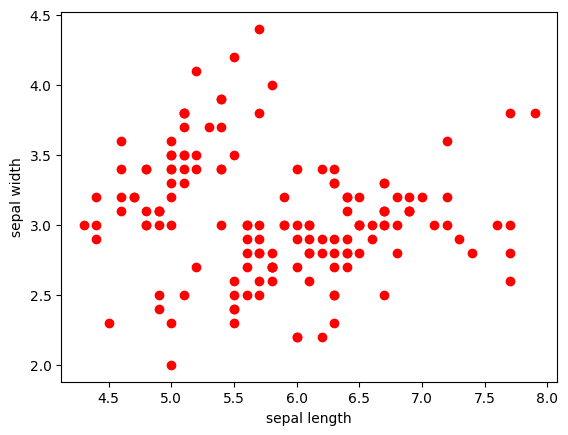

In [14]:
plt.scatter(x,y,color='red')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [15]:
data.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [29]:
train,test = train_test_split(data,test_size=0.2)

In [35]:
train.count()

sepal_length    120
sepal_width     120
petal_length    120
petal_width     120
species         120
dtype: int64

In [34]:
test.count()

sepal_length    30
sepal_width     30
petal_length    30
petal_width     30
species         30
dtype: int64

In [37]:
trainx=train[['sepal_length','sepal_width','petal_length','petal_width']]
testx=test[['sepal_length','sepal_width','petal_length','petal_width']]
trainy=train[['species']]
testy=test[['species']]

In [39]:
trainx

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
37,4.9,3.1,1.5,0.1
41,4.5,2.3,1.3,0.3
138,6.0,3.0,4.8,1.8
36,5.5,3.5,1.3,0.2
...,...,...,...,...
47,4.6,3.2,1.4,0.2
147,6.5,3.0,5.2,2.0
87,6.3,2.3,4.4,1.3
82,5.8,2.7,3.9,1.2


In [41]:
trainy

,species
104,2
37,0
41,0
138,2
36,0
...,...
47,0
147,2
87,1
82,1


In [45]:
testy.count()

species    30
dtype: int64

### Data Modelling

In [48]:
model = LogisticRegression()
model.fit(trainx,trainy)

LogisticRegression()

In [51]:
prediction = model.predict(testx)
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0,
       0, 0, 1, 1, 2, 0, 2, 2], dtype=int64)

In [61]:
accuracy = metrics.accuracy_score(prediction,testy)

In [63]:
accuracy

1.0

### Predictions
### Using Support Vector

In [71]:
model1=svc()
model1.fit(trainx,trainy)
predy=model1.predict(testx)
predy


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0,
       0, 0, 1, 1, 2, 0, 2, 2], dtype=int64)

In [73]:
accuracy_score(testy,predy)

1.0

In [85]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(trainx,trainy)
preddy=model2.predict(testx)
accuracy_score(testy,preddy)

1.0

In [88]:
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(trainx,trainy)
preddy=model3.predict(testx)
accuracy_score(testy,preddy)

0.9666666666666667

In [95]:
results = pd.DataFrame({
    'Model':['Support vector machine','KNN','Decision Tree'],
    'Accuracy Score':[1,1,0.97]
})

result_data = results.sort_values(by='Accuracy Score',ascending=False)
# result_data = result_data.set_index('Accuracy Score')
result_data

,Model,Accuracy Score
0,Support vector machine,1.00
1,KNN,1.00
2,Decision Tree,0.97
